In [1]:
import os
import glob
import gc
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
from matplotlib.image import imread
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import load_img
from tensorflow.keras.applications import VGG16, VGG19,vgg
from tensorflow.keras.applications import MobileNetV2
#from tensorflow.keras.applications import EfficientNetB7,ResNet50

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

#압축해제
import zipfile

zip_file = zipfile.ZipFile('/content/drive/MyDrive/kaggle/patato-plant-disease.zip', 'r')
extract_dir = 'potato-plant-disease'
zip_file.extractall(extract_dir)


# 원본 데이터 폴더
healthy_dir = glob.glob("potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy/*")
late_blight_dir =  glob.glob("potato-plant-disease/PlantVillage/PlantVillage/Potato___Late_blight/*")
early_blight_dir =  glob.glob("potato-plant-disease/PlantVillage/PlantVillage/Potato___Early_blight/*")


#train 데이터/test 데이터 설정
train_h, test_h = train_test_split(healthy_dir, test_size=0.2,
random_state=42)
train_e, test_e = train_test_split(early_blight_dir, test_size=0.2,
random_state=42)
train_l, test_l = train_test_split(late_blight_dir, test_size=0.2,
random_state=42)




Mounted at /content/drive


In [3]:
print("Healthy images:", train_h)
print("Early Blight images:", train_e)
print("Late Blight images:", train_l)


Healthy images: ['potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy/8665efd2-fa3d-45f8-b1c0-746c99fb7d1e___RS_HL 1924.JPG', 'potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy/7948ada9-eabc-4cb7-a579-b73e938eb716___RS_HL 4185.JPG', 'potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy/52dd2fdd-6966-450c-a42b-ee14428d4271___RS_HL 1955.JPG', 'potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy/413bc2e9-eb2a-48fd-ba65-48b5121fd85c___RS_HL 4200.JPG', 'potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy/f4b5ec24-d318-4309-8294-9126450d5d7f___RS_HL 1824.JPG', 'potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy/d287be3d-cac6-4485-8c31-674fb8b459be___RS_HL 1973.JPG', 'potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy/9a6eb7c4-6b43-477a-89e0-69f62ef67991___RS_HL 1846.JPG', 'potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy/ec6e43d3-512d-4908-99f2-c9e2a0be54be___RS_HL 4202.JPG', 'potato-plant-d

The Image size of Healthy Potato Plant : (256, 256, 3)
The Image size of Early Blight Potato Plant: (256, 256, 3)
The Image size of Late Blight Potato Plant: (256, 256, 3)


Text(0.5, 1.0, 'Late Potato Plant')

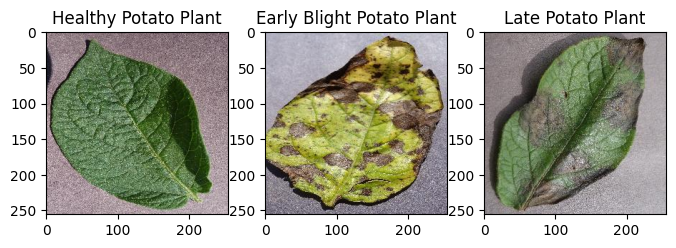

In [4]:
# 각 카테고리(클래스) 사이의 차이점 찾아내기
print(f"The Image size of Healthy Potato Plant : {imread(train_h[0]).shape}")
print(f"The Image size of Early Blight Potato Plant: {imread(train_e[0]).shape}")
print(f"The Image size of Late Blight Potato Plant: {imread(train_l[0]).shape}")

fig, ax = plt.subplots(1,3,figsize=(8,5))
ax[0].imshow(imread(train_h[0]))
ax[0].set_title('Healthy Potato Plant')

ax[1].imshow(imread(train_e[0]))
ax[1].set_title('Early Blight Potato Plant')

ax[2].imshow(imread(train_l[0]))
ax[2].set_title('Late Potato Plant')

The image numbers of Healthy : 152
The image numbers of Early Blight  : 1000
The image numbers of Late Blight  : 1000


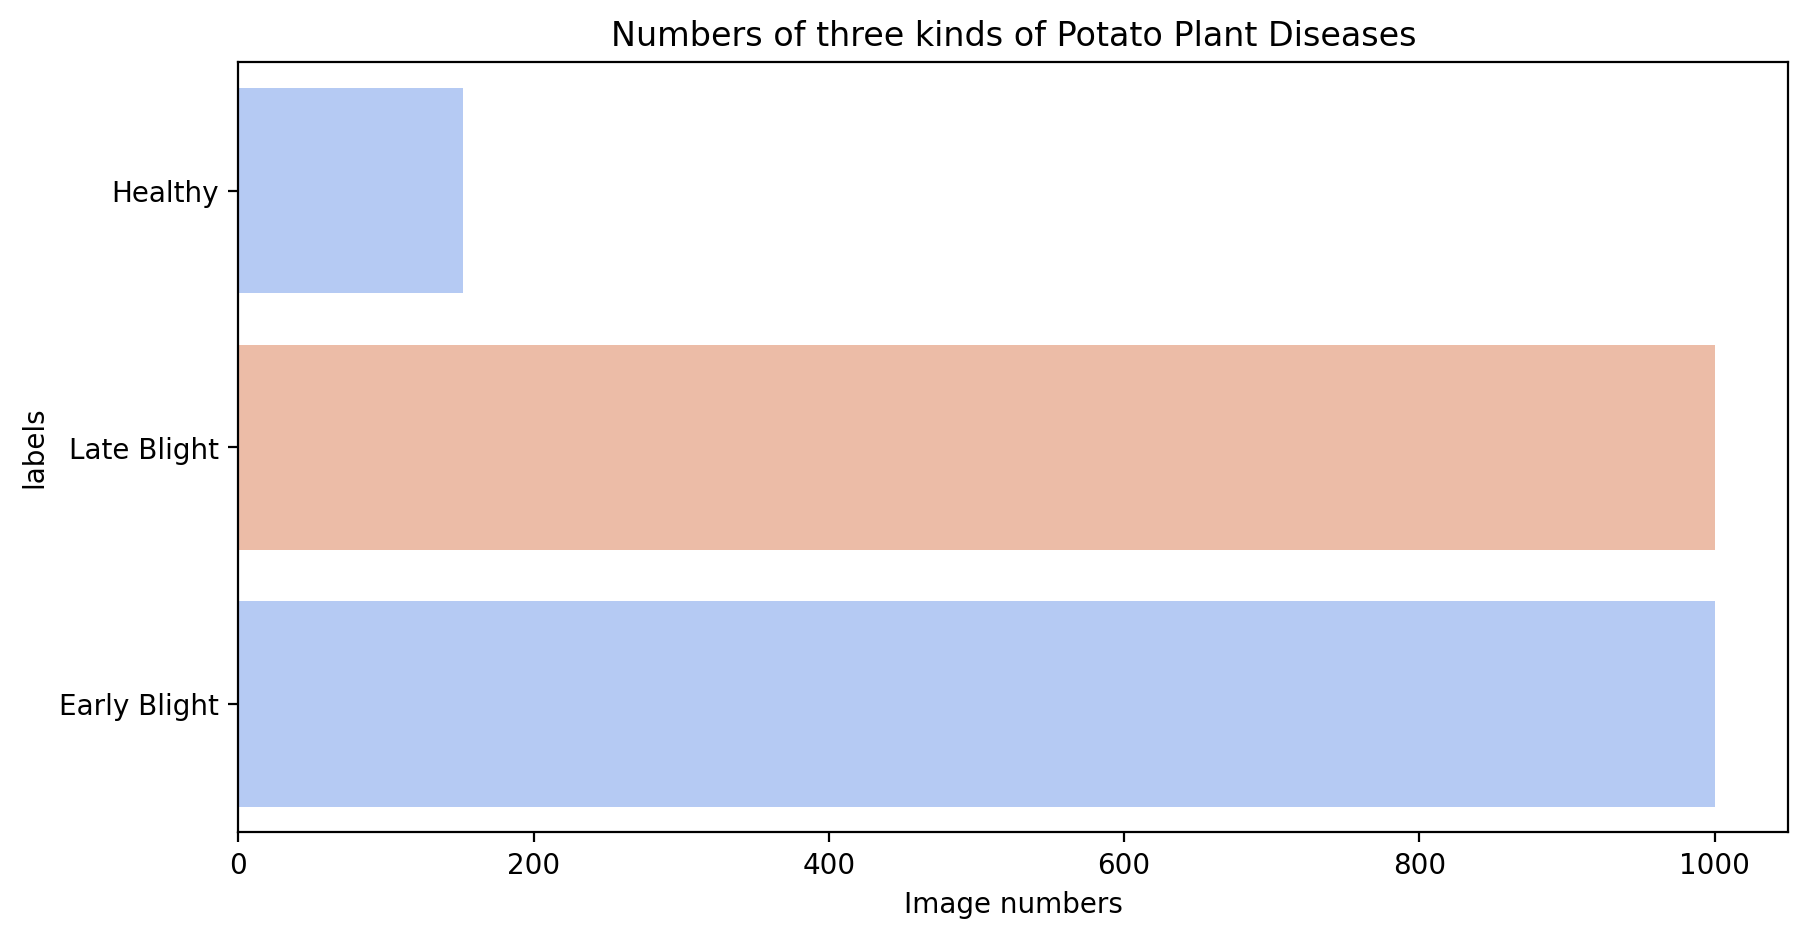

In [5]:
# Definition of 3 types of Potato Plant
num_h = len(os.listdir('/content/potato-plant-disease/PlantVillage/PlantVillage/Potato___healthy'))
num_l = len(os.listdir('/content/potato-plant-disease/PlantVillage/PlantVillage/Potato___Late_blight'))
num_e = len(os.listdir('/content/potato-plant-disease/PlantVillage/PlantVillage/Potato___Early_blight'))

df = pd.DataFrame({'labels' : ['Healthy', 'Late Blight', 'Early Blight'],
'Image numbers' : [num_h, num_l, num_e]})

print(f"The image numbers of Healthy : {num_h}")
print(f"The image numbers of Early Blight  : {num_l}")
print(f"The image numbers of Late Blight  : {num_e}")

palette1 = sns.color_palette('coolwarm',2)
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(df, y='labels', x='Image numbers', palette=palette1)
plt.title('Numbers of three kinds of Potato Plant Diseases')
plt.show()

In [6]:
# 폴더로 이동
def move_file(file_path, destination_folder):
  if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
  for file in file_path:
    shutil.copy(file, destination_folder)

move_file(train_h, '/kaggle/working/train/healthy')
move_file(train_e, '/kaggle/working/train/early')
move_file(train_l, '/kaggle/working/train/late')

move_file(test_h, '/kaggle/working/test/healthy')
move_file(test_e, '/kaggle/working/test/early')
move_file(test_l, '/kaggle/working/test/late')

train_path = '/kaggle/working/train/'
test_path = '/kaggle/working/test'

In [ ]:

# Healthy 증강된 데이터를 저장할 새로운 폴더 생성
augmented_dir = "/kaggle/working/train_augmented"
os.makedirs(augmented_dir, exist_ok=True)

# Healthy 클래스만 증강을 적용하는 ImageDataGenerator 생성
healthy_gen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.1, height_shift_range=0.2,
    rescale=1/255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest'
)

# Healthy 데이터 복사 후 증강 저장
healthy_source_path = os.path.join(train_path, "healthy")
healthy_save_path = os.path.join(augmented_dir, "healthy")
os.makedirs(healthy_save_path, exist_ok=True)

healthy_images = os.listdir(healthy_source_path)
print(len(healthy_images))
# 증강 데이터 생성 (Healthy 클래스만)
for img_file in healthy_images:
    img_path = os.path.join(healthy_source_path, img_file)
    img = image.load_img(img_path, target_size=(224, 224))  # 이미지 로드
    img_array = image.img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # 차원 확장

    i = 0
    for batch in healthy_gen.flow(img_array, batch_size=1, save_to_dir=healthy_save_path, save_prefix="aug", save_format="jpg"):
        i += 1
        if i == 5:  # 기존 이미지 1개당 5개씩 증강
            break

# Early Blight, Late Blight 데이터 원본 복사
for class_name in ["early", "late"]:
    src_path = os.path.join(train_path, class_name)
    dst_path = os.path.join(augmented_dir, class_name)
    os.makedirs(dst_path, exist_ok=True)
    for img_file in os.listdir(src_path):
        shutil.copy(os.path.join(src_path, img_file), os.path.join(dst_path, img_file))

# 종 Augmented 데이터셋 로드
train_gen = ImageDataGenerator(rescale=1/255).flow_from_directory(
    augmented_dir, target_size=(224, 224), batch_size=64, class_mode='sparse'
)

# Test 데이터는 증강 없이 로드
test_gen = ImageDataGenerator(rescale=1/255).flow_from_directory(
    test_path, target_size=(224, 224), batch_size=64, class_mode='sparse'
)

print(train_gen.class_indices)
print(test_gen.class_indices)

121
Found 2192 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
{'early': 0, 'healthy': 1, 'late': 2}
{'early': 0, 'healthy': 1, 'late': 2}


Text(0.5, 1.0, 'Healthy Plant generator')

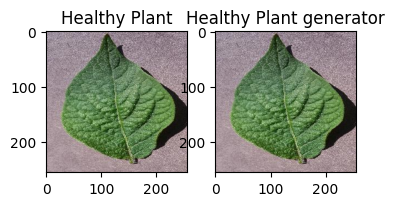

In [ ]:
# 이미지 생성기에 넣으면 어떻게 되는지 확인하기
fig, ax = plt.subplots(1,2, figsize=(4,10))

ax[0].imshow(imread(train_h[0]))
ax[0].set_title('Healthy Plant')


ax[1].imshow(train_gen.image_data_generator.random_transform(imread(train_h[0])))
ax[1].set_title('Healthy Plant generator')

In [7]:
from tensorflow.keras.applications import ResNet50

image_shape = (244,244,3)
base_model = VGG19(weights='imagenet', include_top=False,input_shape=image_shape)
base_model2 = VGG16(weights='imagenet', include_top=False,input_shape=image_shape)
base_model3 = MobileNetV2(weights='imagenet', include_top=False,input_shape=image_shape)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# 총 Augmented 데이터셋 로드
train_gen = ImageDataGenerator(rescale=1/255).flow_from_directory(
    train_path, target_size=(244, 244), batch_size=64, class_mode='sparse'
)

# Test 데이터는 증강 없이 로드
test_gen = ImageDataGenerator(rescale=1/255).flow_from_directory(
    test_path, target_size=(244, 244), batch_size=64, class_mode='sparse'
)

print(train_gen.class_indices)
print(test_gen.class_indices)

Found 1721 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
{'early': 0, 'healthy': 1, 'late': 2}
{'early': 0, 'healthy': 1, 'late': 2}


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, SimpleRNN, Rescaling
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(256, activation='relu'),
  Dropout(0.3),
  Dense(3, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001),
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)
history = model.fit(train_gen, validation_data=test_gen,
epochs=20, callbacks=early_stop)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,156,483 (76.89 MB)

 Trainable params: 20,156,483 (76.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5682 - loss: 0.9685 - val_accuracy: 0.7541 - val_loss: 0.5856
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.8437 - loss: 0.4425 - val_accuracy: 0.9095 - val_loss: 0.3076
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9183 - loss: 0.2756 - val_accuracy: 0.9165 - val_loss: 0.1957
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.9326 - loss: 0.1816 - val_accuracy: 0.9513 - val_loss: 0.1249
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9577 - loss: 0.1145 - val_accuracy: 0.9374 - val_loss: 0.1755
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.9528 - loss: 0.1278 - val_accuracy: 0.9768 - val_loss: 0.0763
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9772 - loss: 0.0567 - val_accuracy: 0.9814 - val_loss: 0.0864
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9837 - loss: 0.0588 - val_accuracy: 0.91

In [10]:
model2 = Sequential([
  base_model2,
  GlobalAveragePooling2D(),
  Dense(256, activation='relu'),
  Dropout(0.3),
  Dense(3, activation='softmax')
])

model2.compile(optimizer=Adam(learning_rate=0.0001),
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()


early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)
history2 = model2.fit(train_gen, validation_data=test_gen,
epochs=20, callbacks=early_stop)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,846,787 (56.64 MB)

 Trainable params: 14,846,787 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.6552 - loss: 0.7352 - val_accuracy: 0.9095 - val_loss: 0.2381
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.9177 - loss: 0.2079 - val_accuracy: 0.9629 - val_loss: 0.0981
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9665 - loss: 0.1007 - val_accuracy: 0.9582 - val_loss: 0.1349
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9737 - loss: 0.0595 - val_accuracy: 0.9838 - val_loss: 0.0513
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9965 - loss: 0.0249 - val_accuracy: 0.9907 - val_loss: 0.0222
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9930 - loss: 0.0235 - val_accuracy: 0.9722 - val_loss: 0.1002
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9960 - loss: 0.0207 - val_accuracy: 0.9861 - val_loss: 0.0342
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.9964 - loss: 0.0059 - val_accuracy: 0

In [11]:
model3 = Sequential([
  base_model3,
  GlobalAveragePooling2D(),  # Feature Map을 Flatten하지 않고 평균 풀링
  Dense(256, activation='relu'),
  Dropout(0.3),
  Dense(3, activation='softmax')
])

model3.compile(optimizer=Adam(learning_rate=0.0001),
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)
history3 = model3.fit(train_gen, validation_data=test_gen,
epochs=20, callbacks=early_stop)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,586,691 (9.87 MB)

 Trainable params: 2,552,579 (9.74 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7530 - loss: 0.5577 - val_accuracy: 0.4107 - val_loss: 1.1950
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.9927 - loss: 0.0313 - val_accuracy: 0.5615 - val_loss: 1.0847
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9993 - loss: 0.0078 - val_accuracy: 0.4826 - val_loss: 1.1949
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9975 - loss: 0.0115 - val_accuracy: 0.5800 - val_loss: 1.1623
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.5800 - val_loss: 1.1623
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.6032 - val_loss: 1.0509
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.6172 - val_loss: 1.0346
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 1.0000 - loss: 8.0658e-04 - val_accuracy:

In [12]:

# ResNet loss, accuracy 출력
loss_res, accuracy_res = model.evaluate(test_gen)
print(f"VGG19 loss : {loss_res}")
print(f"VGG19 accuracy : {accuracy_res}")

# VGG16 loss, accuracy 출력
loss_vgg, accuracy_vgg = model2.evaluate(test_gen)
print(f"VGG16 loss : {loss_vgg}")
print(f"VGG16 accuracy : {accuracy_vgg}")

# EfficientNetB0 loss, accuracy 출력
loss_eff, accuracy_eff = model3.evaluate(test_gen)
print(f"MobileNetV2 loss : {loss_eff}")
print(f"MobileNetV2 accuracy : {accuracy_eff}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9675 - loss: 0.0956
VGG19 loss : 0.12973876297473907
VGG19 accuracy : 0.9605568647384644
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.9725 - loss: 0.0791
VGG16 loss : 0.05288543179631233
VGG16 accuracy : 0.9814385175704956
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.5526 - loss: 1.7450
MoblieNet loss : 1.8675583600997925
MobileNetV2 accuracy : 0.5220417380332947


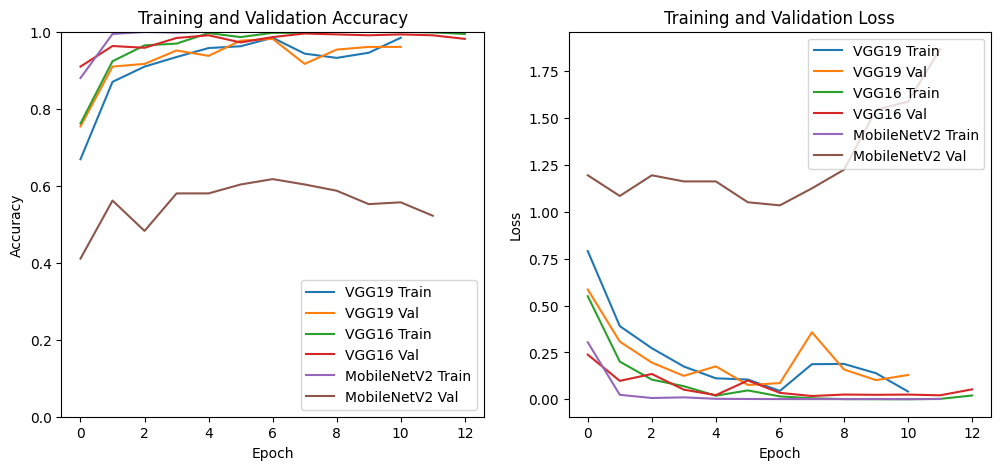

In [14]:

import matplotlib.pyplot as plt


# 정확도 및 손실 그래프 비교
plt.figure(figsize=(12, 5))

# 정확도 비교 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='VGG19 Train')
plt.plot(history.history['val_accuracy'], label='VGG19 Val')
plt.plot(history2.history['accuracy'], label='VGG16 Train')
plt.plot(history2.history['val_accuracy'], label='VGG16 Val')
plt.plot(history3.history['accuracy'], label='MobileNetV2 Train')
plt.plot(history3.history['val_accuracy'], label='MobileNetV2 Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 손실 비교 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='VGG19 Train')
plt.plot(history.history['val_loss'], label='VGG19 Val')
plt.plot(history2.history['loss'], label='VGG16 Train')
plt.plot(history2.history['val_loss'], label='VGG16 Val')
plt.plot(history3.history['loss'], label='MobileNetV2 Train')
plt.plot(history3.history['val_loss'], label='MobileNetV2 Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
